Vous pouvez rendre ce travail *si vous le souhaitez*, sur papier ou en déposant votre fichier `.ipynb` dans votre dossier `Depot_fichiers` sur [cloud.maths.mlong.fr](https://cloud.maths.mlong.fr).

____________

# La chasse aux fantômes

Un groupe de $n$ chasseurs de fantômes combat un groupe de $n$ fantômes. Chaque chasseur est armé d'un canon à ions, capable d'éradiquer un fantôme d'un coup de rayon. Un rayon se propage en ligne droite et termine sa course en touchant le fantôme.

Les chasseurs sont confrontés à deux problèmes : il est nécessaire d'éliminer tous les fantômes en même temps, sinon ils se multiplient pour revenir au nombre initial de $n$ fantômes ; il est très dangereux que deux rayons se croisent, cela ne doit donc pas se produire. Le combat se déroule dans une grotte cylindrique creuse, dont la base est un disque. Les déplacements (chasseurs et fantômes) ne sont possibles que sur un rebord confondu avec la circonférence, mais les tirs se font entre deux points de la circonférence, selon des cordes du cercle.

## Partie A

Les $2n$ protagonistes sont représentés par des points distincts $P_1, P_2, ..., P_{2n}$ répartis dans l'ordre des indices croissants sur la circonférence d'un cercle parcouru dans le sens trigonométrique ; $n$ sont des chasseurs, $n$ des fantômes, mais, dans cette section A, on cherche les liens possibles entre les $P_i$ sans s'occuper de qui est chasseur et qui est fantôme. Les points doivent être reliés deux à deux par une
corde du cercle selon une stratégie gagnante pour les chasseurs. Pour cela, il faut donc respecter les deux conditions :

- chaque point est une extrémité d'une et une seule corde,
- les différentes cordes ne doivent pas se couper.

Dans toute la suite on fixe un entier $n > 0$ et on appelle stratégie de taille $n$ un
vecteur $(c[1], c[2], . . . , c[2n])$, tel que pour tout entier i vérifiant $1 \leqslant i \leqslant 2n$ on ait :
$$ 1 \leqslant c[i] \leqslant 2n, \qquad c\left[ c[i] \right] = i, \qquad c[i] \neq i$$
Cette notation exprime bien le lien entre les points $P_i$ et $P_j$ lorsque $j = c[i]$.

En OCaml, on représente le vecteur avec le type `array`. On peut utiliser
la fonction `Array.make`. Les éléments des vecteurs en OCaml sont numérotés de $0$ à
$N-1$. On prendra des vecteurs de taille $2n+1$, dont le premier élément ne sera pas
utilisé, pour que les points soient bien aux indices $1$ à $2n$ dans le vecteur Caml.

On considère des stratégies où les points d'une paire sont reliés par des segments
de droites **situés dans un même plan**. Une stratégie est dite *admissible* si les
segments ainsi formés ne se coupent pas. On admet que cette propriété ne dépend
pas de la position des points sur la circonférence mais seulement de la stratégie.

Par exemple, pour les stratégies de taille 4, $c_1$ et $c_2$ ci-dessous :

|$\ $|$1$|$2$|$3$|$4$|$5$|$6$|$7$|$8$|
|--|--|--|--|--|--|--|--|--|
|$c_1$ |$2$|$1$|$6$|$5$|$4$|$3$|$8$|$7$|
|$c_2$|$2$|$1$|$7$|$5$|$4$|$8$|$3$|$6$|

La figure de gauche correspond à $c_1$ qui est donc admissible, et celle de droite à $c_2$ qui, elle, ne l'est pas.

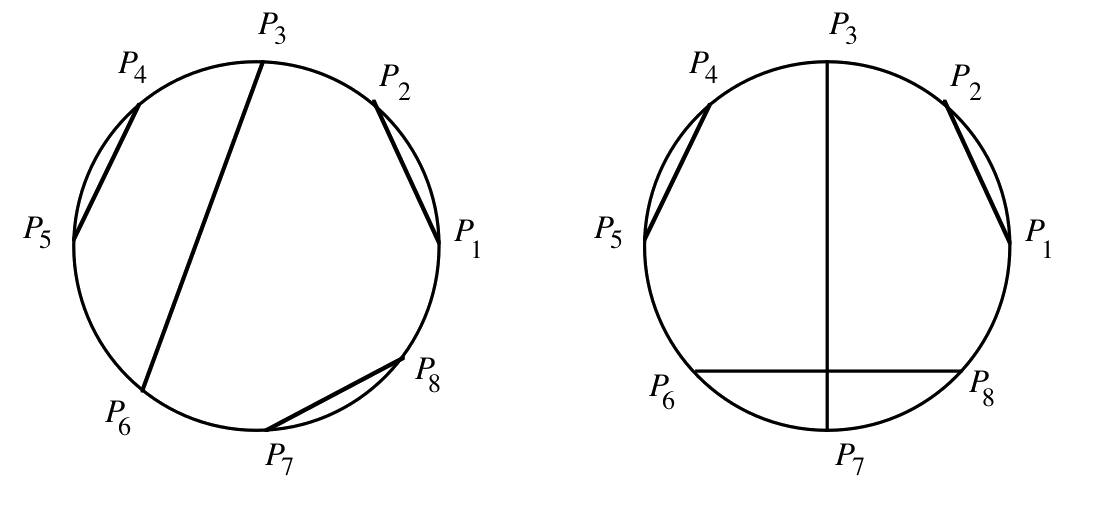

<font size="5">👨‍💻</font> Dans le cas $n = 3$, donner le nombre de stratégies possibles, admissibles ou
non.

(* BEGIN SOLUTION *)
Les valeurs possibles pour $c[1]$ sont $2$, $3$, $4$, $5$ et $6$, soit $5$ possibilités. Une fois $c[1]$ fixé, il reste $3$ possibilités pour $c[j]$ où $j=\min ⟦ 1, 6 ⟧ \setminus \{1, c[1] \}$, puis les deux valeurs restantes doivent être associées l'une à l'autre.
	
Finalement, il y a $\boxed{15}$ stratégies possibles.
(* END SOLUTION *)

<font size="5">👩🏽‍💻</font> Préciser le nombre de stratégies de taille 3 qui sont admissibles. Les représenter
sur une figure au brouillon puis sous forme de tableau.

(* BEGIN SOLUTION *)
Si $c[1] = 3$, $P_2$ est isolé et il n'y a pas de stratégie admissible. De même , $c[1]$ ne peut pas être égal à $5$, car $P_6$ serait isolé. Plus généralement, $c[k] \not\equiv k\pm 2 [6]$ pour tout $k \in ⟦ 1, 6 ⟧$. On en déduit les $5$ stratégies admissibles parmi les stratégies de taille 3.

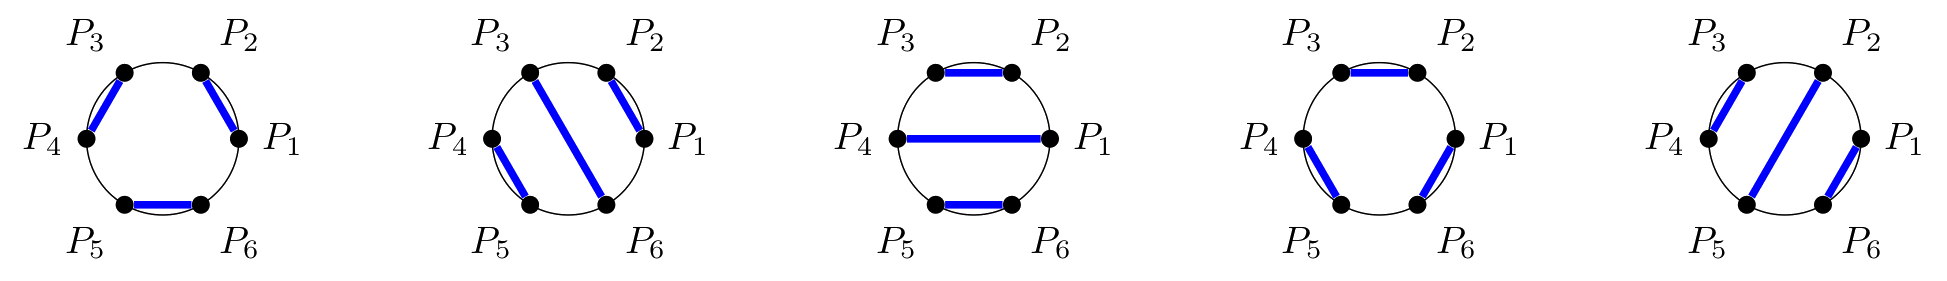

(* END SOLUTION *)

<font size="5">👨🏾‍💻</font> Déterminer le nombre de stratégies de taille $n$ entier positif (qu'elles soient
ou non admissibles).

(* BEGIN SOLUTION *)
 Notons $S_n$ le nombre de stratégies de taille $n$. Si $n \geqslant 2$, il y a $2n-1$ choix possibles pour $c[1]$ ; ce choix fixe aussi $c[c[1]]$, il reste alors $2n-2$ points à associer d'où $S_n = (2n-1)S_{2n-2}$.

De plus, $S_1 = 1$. 

On en déduit par récurrence que $S_n = \displaystyle \prod_{k=1}^{n} (2k-1) = \frac{\displaystyle \prod_{k=1}^{2n}k}{\displaystyle \prod_{k=1}^{n} 2k} = \boxed{\frac{(2n)!}{2^nn!}}$.

(* END SOLUTION *)

## Partie B

Soit $i, j, k, l$ quatre entiers distincts tels que : $1 \leqslant i < j \leqslant 2n$ et $1 \leqslant k < l \leqslant 2n$


<font size="5">👩🏻‍💻</font> Donner une condition nécessaire et suffisante, portant uniquement sur ces
entiers, pour que les segments $[P_iP_j]$ et $[P_kP_l]$ se croisent.

(* BEGIN SOLUTION *)
Les segments $[P_iP_j]$ et $[P_kP_l]$ se croisent si et seulement si $i < k < j < l$ ou $k < i < l < j$.
(* END SOLUTION *)

<font size="5">👨🏽‍💻</font>
Écrire une fonction `croise` prenant les quatre entiers pour paramètres et
renvoyant un booléen dont le résultat est `true` si et seulement si les segments $[P_iP_j]$
et $[P_kP_l]$ se croisent. On suppose que les paramètres donnés à la fonction satisfont
les conditions données en introduction du B.

In [3]:
(* BEGIN SOLUTION *)
let croise i j k l =
  (i<k && k<j && j<l) || (k<i && i<l && l<j) ;;
(* END SOLUTION *)

val croise : 'a -> 'a -> 'a -> 'a -> bool = <fun>


<font size="5">👩🏼‍💻</font>
En utilisant la fonction `croise`, écrire une fonction `estAdmissible` qui
prend en paramètre le vecteur et renvoie un booléen dont le résultat est `true` si la stratégie est admissible.

In [4]:
(* BEGIN SOLUTION *)
let estAdmissible c =
  let l = Array.length c (* l = 2n+1 *) in
  let i = ref 1 in
  let correct = ref true in
  in
  while !correct && !i < l do
    if !i < c.(!i)
    then
      begin
        let k = ref (!i+1) in
        while !correct && !k < c.(!i) do
          let k1 = min !k c.(!k)
          and k2 = max !k c.(!k)
          in
          if croise !i c.(!i) k1 k2
          then correct := false
          else incr k
        done
      end ;
    incr i
  done ;
  !correct
;;
(* END SOLUTION *)

val estAdmissible : int array -> bool = <fun>


<font size="5">👨🏿‍💻</font>
Donner, en la justifiant, la complexité de cette méthode, en terme de temps
de calcul (on se contentera d'une évaluation du type $O(n^\alpha$), en précisant la valeur
de $\alpha$).

(* BEGIN SOLUTION *)
 La première boucle while réalise au plus $2n$ itérations ; la deuxième en réalise au plus $c[i]-i < 2n$ et ses itérations s'effectuent en temps $O(1)$, donc l'algorithme a une complexité en $O(n^2)$ (complexité quadratique).
(* END SOLUTION *)

## Partie C

On souhaite tester la stratégie de façon plus efficace. Pour cela on utilise une
fonction `evalue` qui prend deux entiers $i$ et $j$ comme paramètres ($i$ et $j$ étant compris
entre $1$ et $2n$) et dont le résultat est `true` si et seulement si les deux propositions
suivantes sont vraies :
- $(i \leqslant k \leqslant j ) \Rightarrow (i \leqslant c[k] \leqslant j)$
- les segments ayant leurs extrémités dans l'arc (fermé) $[P_iP_j]$ ne se croisent pas.

<font size="5">👩🏿‍💻</font>  Donner la valeur de `evalue(i,j`) dans les trois cas particuliers a, b et c
suivants : 

a) $j < i$ ; $\qquad$ b) $j \geqslant i$ et $c[i] < i$ ; $\qquad$ c) $j \geqslant i$ et $c[i] > j$.

(* BEGIN SOLUTION *)
- Si $j<i$ alors $\{k \in ⟦ 1, 2n ⟧ \mid i \leqslant k \leqslant j \} = \emptyset$ donc la première proposition est vérifiée.
	
	De plus l'arc $[P_iP_j]$ est vide donc la deuxième proposition est vraie.
	
	Par conséquent, `evalue (i,j)` vaut `true`.
- Si $j \geqslant i$ et $c[i] < i$ alors $k=i$ vérifie $i \leqslant k  \leqslant j$ mais pas $i \leqslant c[k] \leqslant j$ donc la première proposition est fausse.
	
	Par conséquent, `evalue (i,j)` vaut `false`.
- De même, la première proposition est fausse pour $k=i$. Donc `evalue (i,j)` vaut `false`.

	
(* END SOLUTION *)

<font size="5">👩‍💻</font>
Pour $i < c[i] < j$, montrer que `evalue(i,j)` se déduit de  `evalue(i + 1,c[i] - 1)` et de `evalue(c[i] + 1, j)`.

(* BEGIN SOLUTION *)

- Supposons que `evalue (i,j)` vaut  `true`.
 	
  Soit $k \in ⟦ i-1, c[i]-1 ⟧$. $k \neq i$ et $k \neq c[i]$, donc $i$, $k$, $c[i]$ et $c[k]$ sont distincts. De plus, $i \leqslant k \leqslant j$ donc $i \leqslant c[k] \leqslant j$.
 	
  Supposons que $c[k] \not \in ⟦ i+1, c[i]-1⟧$. Alors $i < k < c[i] < c[k]$, donc les segments $[P_iP_{c[i]}]$ et $[P_kP_{c[k]}]$ se croisent. Or leurs extrémités sont dans l'arc fermé $[P_iP_j]$ : absurde car `evalue (i,j)` vaut  `true`.
 	
  Par conséquent, $i+1 \leqslant k \leqslant c[i]-1 \Rightarrow i+1 \leqslant c[k] \leqslant c[i]-1$.
 	
  De plus, les segments ayant leurs extrémités dans l'arc fermé $[P_{i+1}P_{c[i]-1}]$ ne se croisent pas, puisque leurs extrémités sont dans l'arc $[P_iP_j]$.
 	
  Par conséquent, `evalue (i+1,c[i]-1)` vaut `true`.\medskip
 	
  Par un raisonnement similaire, `evalue (c[i]+1, j)` vaut `true`.
- Réciproquement, supposons que  `evalue (i+1,c[i]-1)` vaut `true` et `evalue (c[i]+1, j)` vaut `true`.

  Soit $k$ un entier tel que $i \leqslant k \leqslant j$.
    * Si $k=i$ alors $i \leqslant c[k] \leqslant j$.
    * Si $k=c[i]$ alors $i = c[k]$ donc $i \leqslant c[k] \leqslant j$.
    * Si $k \in ⟦ i+1, c[i]-1 ⟧$ alors $i+1 \leqslant c[k] \leqslant c[i]-1$, donc $i \leqslant c[k] \leqslant j$.
    * Si $k \in ⟦ c[i]+1,j ⟧$ alors $i \leqslant c[i]+1 \leqslant c[k] \leqslant j$.

  Donc $i \leqslant k \leqslant j \Rightarrow i \leqslant c[k] \leqslant j$. 	
 	
  Comme `evalue (i+1,c[i]-1)` (resp. `evalue (c[i]+1, j)`) vaut `true`, tout segment ayant une extrémité $P_k$ dans l'arc $[P_{i+1}P_{c[i]-1}]$ (resp. $[P_{c[i]+1}P_j]$) a sa deuxième extrémité dans ce même arc.
 	
  Soient deux segments distincts de l'arc fermé $[P_iP_j]$.
    * ou bien les deux segments ont leurs extrémités dans $[P_{i+1}P_{c[i]-1}]$ (resp. $[P_{c[i]+1}P_j]$), donc ils ne se croisent pas, puisque `evalue (i+1,c[i]-1)` (resp. `evalue (c[i]+1, j)`) vaut `true`.
    * ou bien l'un a ses extrémités dans l'arc $[P_{i+1}P_{c[i]-1}]$  et l'autre dans l'arc $[P_{c[i]+1}P_j]$, donc ils ne se croisant pas.
    * ou bien l'un est $P_iP_{c[i]}$ et l'autre a ses extrémités soit dans $[P_{i+1}P_{c[i]-1}]$  soit dans $[P_{c[i]+1}P_j]$, donc ils ne se croisent pas.

  Par conséquent, `evalue (i,j)` vaut  `true`.

Finalement, `evalue (i,j)` vaut `evalue (i+1,c[i]-1) &&  evalue (c[i]+1, j)`
(* END SOLUTION *)

<font size="5">👨🏼‍💻</font>
Écrire une fonction `testStrategie` qui prend en paramètre un vecteur et renvoie un booléen dont la valeur est `true` si la stratégie est admissible. Cette fonction devra être de complexité $O(n)$.

In [5]:
(* BEGIN SOLUTION *)
let testStrategie c =
  let l = Array.length c in (* l = 2n+1 *)
  let rec evalue (i,j) =
    if j < i
    then true
    else 
      if c.(i) < i || c.(i) >  j
      then false
      else evalue (i+1,c.(i)-1) && evalue (c.(i)+1,j)
  in evalue (1,l-1);;
(* END SOLUTION *)

val testStrategie : int array -> bool = <fun>


<font size="5">👨🏻‍💻</font>
Démontrer avec soin que la fonction `testStrategie` est bien de complexité $O(n)$.


(* BEGIN SOLUTION *)
Notons $C_m$ la complexité dans le pire cas de { \tt evalue (i,j)} lorsque le nombre de points dans l'arc ferme $[P_iP_j]$ est $m$ (i.e lorsque $j-i+1 = m$).
- Lorsqu'on est dans un des cas de la question C.1, la complexité est majorée par une constante positive $K_1$.
- Sinon, il y a deux appels récursifs 
    * l'un avec $i+1$ et $c[i]-1$, de complexité au plus $C_p$ avec $p = c[i]-1 - (i+1) +1 =c[i]-i-1 \in ⟦ 0, m-2 ⟧$ (car $c[i] > i$ et $c[i] \leqslant j$).
    * l'autre avec $c[i]+1$ et $j$, de complexité au plus $C_q$ où $q = j-(c[i]+1)+1 = j-c[i] = m-p-2$.
  et les autres instructions ont une complexité constante $K_2$.

  Par conséquent, pour tout $m \geqslant 2$, il existe $p \in ⟦ 0, m-2 ⟧$ tel que 
 	$$C_m \leqslant K + C_p + C_{m-2-p} \text{ où } K = \max \{K_1, K_2 \}$$
 	De plus, $C_0 \leqslant K$ et $C_1 \leqslant K$, car $m=0 \Rightarrow j < i$ et $m=1 \Rightarrow i = j$ donc $m=1 \Rightarrow (c[i] <i \text{ ou } c[i] > j)$.
 	
 	Un raisonnement par récurrence forte permet alors de démontrer que 
 	
 	$$\forall m \in \mathbb{N}, C_m \leqslant K(m+1)$$
 	
 	La complexité de `testStrategie` est alors $C_{2n}+\alpha$ où $\alpha$ est une constante, donc majorée par $K(2n+1)+\alpha$.
 	
 	Finalement, `testStrategie` est bien de complexité linéaire.
(* END SOLUTION *)

## Partie D

La méthode précédente teste si une stratégie est admissible. On souhaite maintenant,
le statut (chasseur ou fantôme) des points étant donné, déterminer directement
une stratégie admissible, de façon également efficace.

<font size="5">👩🏾‍💻</font>
Montrer que si $P_i$ est un chasseur ($1 \leqslant i \leqslant 2n$), alors il existe $j \neq i$, avec
$1 \leqslant j \leqslant 2n$ tel que $P_j$ est un fantôme et tel que le nombre de chasseurs soit égal au
nombre de fantômes de chaque côté de l'axe $P_iP_j$.

(* BEGIN SOLUTION *)
Quitte à renuméroter les points, on peut supposer que $i=1$. Soit $A$ l'ensemble des $k \in ⟦ 1, 2n ⟧$ tels que l'ensemble $\{P_r \mid r \in ⟦ 1, k  ⟧ \}$ comporte au moins autant de fantômes que de chasseurs. Alors $2n \in A$ donc $A \neq \emptyset$, et $A \subset \mathbb{N}$, donc $A$ admet un minimum $j$. Comme $1 \not\in A$, $j \geqslant 2$ et :
- $j-1 \not\in A$ donc l'ensemble $\{P_r \mid r \in ⟦ 1, j-1  ⟧ \}$ comporte strictement plus de chasseurs que de fantômes. 
- L'ensemble $\{P_r \mid r \in ⟦ 1, j  ⟧ \}$ comporte au moins autant de fantômes que de chasseurs. Comme seul $P_j$ est ajouté, si $P_j$ était un chasseur, il y aurait strictement plus de chasseurs que de fantômes.

Par conséquent $P_j$ est un fantôme.
- De plus, si $\{P_r \mid r \in ⟦ 1, j  ⟧ \}$ comportait strictement plus de fantômes que de chasseurs, $\{P_r \mid r \in ⟦ 1, j-1  ⟧ \}$ comporterait au moins autant de fantômes que de chasseurs.

Donc $\{P_r \mid r \in ⟦ 1, j  ⟧ \}$ comporte exactement autant de fantômes que de chasseurs. Il en est alors de même pour les points de  $\{P_r \mid r \in ⟦ j+1, 2n  ⟧ \}$.

\fbox{Le nombre de chasseurs est bien égal au nombre de fantômes de chaque côté de l'axe $P_iP_j$.}
(* END SOLUTION *)

<font size="5">👩🏽‍💻</font>
En déduire un algorithme simple pour construire une stratégie admissible. *Décrire l'algorithme en langage naturel*

(* BEGIN SOLUTION *)
*Entrées :* $i$ et $j$ tels que $i < j$ et $\{P_i, \dots, P_j \}$ contient autant de fantômes que de chasseurs.

*Sortie :* Stratégie admissible sur $\{P_i, \dots, P_j\}$.

- Si $i = j-1$ alors associer $P_i$ et $P_j$.
- Sinon, trouver $k \in ⟦ i, j ⟧$ minimal tel que $P_i$ et $P_k$ soient de nature différente et que $\{P_r \mid r \in ⟦ i, k ⟧ \}$ contienne autant de chasseurs que de fantômes ($k$ existe d'après la question précédente, en inversant si besoin les rôles).

  Pour cela, on initialise $k$ à $i$ puis on l'incrémente tant que $\{P_r \mid r \in ⟦ i, k ⟧ \}$ ne contient pas autant de chasseurs que de fantômes, en mémorisant l'écart entre le nombre de chasseurs et le nombre de fantômes.

- Associer alors $i$ et $k$, puis
  * si  $k \neq i+1$, alors appliquer l'algorithme avec $i+1$ et $k-1$ ;
  * et si $k \neq j$, alors appliquer l'algorithme avec $k+1$ et $j$.

Pour obtenir la stratégie finale, on applique l'algorithme à $1$ et $2n$.
(* END SOLUTION *)

Un vecteur $p$ contient la nature des points $P_i$ : $p[i] = 1$ pour un chasseur,
$p[i] = -1$ pour un fantôme ($1 \leqslant i \leqslant 2n$). On a donc $\displaystyle \sum_{i=1}^{2n} p[i] = 0$
puisqu'il y a autant
de fantômes que de chasseurs. 

<font size="5">👨‍💻</font> Écrire une fonction `cibles`, qui prend en paramètre
le vecteur $p$ et qui renvoie la liste des indices
$(i, j)$ des couples $(P_i, P_j)$ (où $P_i$ est un chasseur et $P_j$ un fantôme), composant une
stratégie admissible du problème.

In [6]:
(* BEGIN SOLUTION *)
let cibles p =
  let l = Array.length p in
  let res = ref [] in
  let associe i j =
    if p.(i) = 1
    then res := (i,j)::!res
    else res := (j,i)::!res
  in
  let rec algo i j =
    if j = i + 1
    then associe i j
    else
      begin
        let k = ref i and s = ref p.(i) in
        while !s <> 0 do
          incr k ;
          s := !s + p.(!k)
        done ;
        associe i !k ;
        if !k > i +1 then algo (i+1) (!k - 1) ;
        if !k < j then algo (!k+1) j
      end
  in
  algo 1 (l-1) ;
  !res
;;
(* END SOLUTION *)

val cibles : int array -> (int * int) list = <fun>
